## EmergingEdge: AI-Powered VC Navigator for Emerging Markets

#### Contents
- **Data verification and Statistical Analysis**
- **Data preprocessing**
- **Exploratory Data Analysis**
- **Model building and Evaluation**
- **Productionizing**

### Introduction
In this project, we delve into the intricate landscape of startups across diverse global markets and countries, unraveling their genesis and evolution. While the allure of pioneering a groundbreaking startup idea is undeniable in today's era, gaining profound insights into the historical trajectory of startups can be instrumental in crafting future entrepreneurial ventures and strategically positioning them within contemporary markets. By leveraging a comprehensive dataset encompassing crucial facets of startups, including founding year, funding history, operational status, and more, we embark on a journey to decipher the past of startup culture. Our objective is to glean invaluable insights that can illuminate the path for nascent startups, and their viability for funding.

### What are Startups?
A startup or start-up is a company or project begun by an entrepreneur to seek, develop, and validate a scalable business model. While entrepreneurship refers to all new businesses, including self-employment and businesses that never intend to become registered, startups refer to new businesses that intend to grow large beyond the solo founder. Startups face high uncertainty and have high rates of failure, but a minority of them do go on to be successful and influential. Some startups become unicorns: privately held startup companies valued at over US$1 billion.
Though a vast majority of startups fail, some of history's most successful entrepreneurs created startups like Microsoft (founded by Bill Gates), Ford Motors (founded by Henry Ford), and McDonald's (founded by Ray Kroc).


### Import Libraries

In [1]:
# importing Libraries

# for Data Analysis
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data pre processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset -- PLEASE NOTE THE ENCODING WHEN LOADING THE DATASET
df = pd.read_csv(r"C:\Users\akann\Documents\10ALYTICS\OPTIMUS AI - HACKATHON\investments_VC.csv", encoding='latin1')
df.head()

,permalink,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,/organization/waywire,#waywire,http://www.waywire.com,|Entertainment|Politics|Social Media|News|,News,"17,50,000",acquired,USA,NY,New York City,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,/organization/tv-communications,&TV Communications,http://enjoyandtv.com,|Games|,Games,"40,00,000",operating,USA,CA,Los Angeles,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,/organization/rock-your-paper,'Rock' Your Paper,http://www.rockyourpaper.org,|Publishing|Education|,Publishing,"40,000",operating,EST,NaN,Tallinn,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,/organization/in-touch-network,(In)Touch Network,http://www.InTouchNetwork.com,|Electronics|Guides|Coffee|Restaurants|Music|i...,Electronics,"15,00,000",operating,GBR,NaN,London,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,/organization/r-ranch-and-mine,-R- Ranch and Mine,NaN,|Tourism|Entertainment|Games|,Tourism,"60,000",operating,USA,TX,Dallas,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Data Dictionary

In [3]:
desc = ['Static hyperlink for the startup on Crunchbase\'s website','name of the startup','Website address of the startup',
       'in which category the startups fall','which market the startup caters to','total funding received(in USD)',
        'current operating status','country of origin','state of origin','region','city of origin','total rounds of funding',
        'date of founding','month of founding','quarter of founding','year of founding','date of first funding','date of last funding',
        'seed funding received(in USD)','venture funding received(in USD)','funding received by diluting equity',
        'other undisclosed funding sources','funding received from convertible notes','funding received from debts',
        'funding received from angel investors','funding from grants','funding from private equity',
        'funding from equity dilution after IPO','funding from debts after IPO','funding from secondary markets',
        'funding from crowdfunding','round A funding','round B funding','round C funding','round D funding','round E funding',
       'round F funding']
df_details = pd.DataFrame(list(zip(df.columns, desc)), columns =['Column', 'Description'])
df_details


,Column,Description
0,permalink,Static hyperlink for the startup on Crunchbase...
1,name,name of the startup
2,homepage_url,Website address of the startup
3,category_list,in which category the startups fall
4,market,which market the startup caters to
5,funding_total_usd,total funding received(in USD)
6,status,current operating status
7,country_code,country of origin
8,state_code,state of origin
9,region,region


### Data Preprocessing

In [4]:
#verify column names
print(df.columns)


Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


In [5]:
# Data verification: Data types, number of features and rows.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49438 non-null  object 
 1   name                  49437 non-null  object 
 2   homepage_url          45989 non-null  object 
 3   category_list         45477 non-null  object 
 4    market               45470 non-null  object 
 5    funding_total_usd    49438 non-null  object 
 6   status                48124 non-null  object 
 7   country_code          44165 non-null  object 
 8   state_code            30161 non-null  object 
 9   region                44165 non-null  object 
 10  city                  43322 non-null  object 
 11  funding_rounds        49438 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [6]:
#deleting duplicate rows.
df = df.drop_duplicates()
print(df.shape)

(49439, 39)


permalink                   1
name                        2
homepage_url             3450
category_list            3962
 market                  3969
 funding_total_usd          1
status                   1315
country_code             5274
state_code              19278
region                   5274
city                     6117
funding_rounds              1
founded_at              10885
founded_month           10957
founded_quarter         10957
founded_year            10957
first_funding_at            1
last_funding_at             1
seed                        1
venture                     1
equity_crowdfunding         1
undisclosed                 1
convertible_note            1
debt_financing              1
angel                       1
grant                       1
private_equity              1
post_ipo_equity             1
post_ipo_debt               1
secondary_market            1
product_crowdfunding        1
round_A                     1
round_B                     1
round_C   

<Axes: >

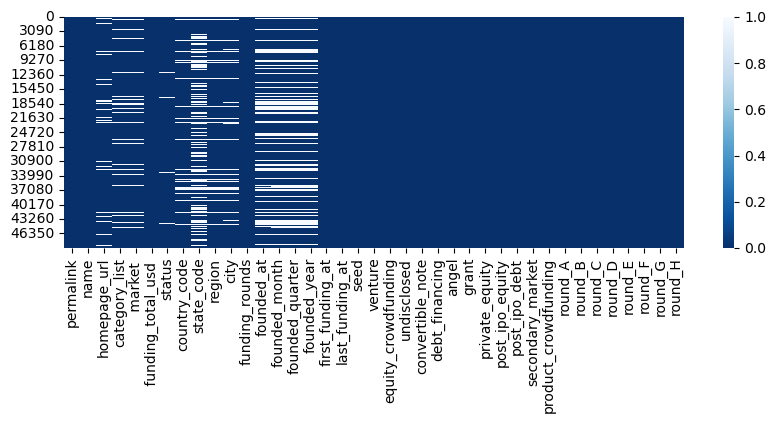

In [7]:
# checking for missing values
print(df.isnull().sum())

# visualizing missing values
plt.figure(figsize=(10,3))
sns.heatmap(df.isnull(), cbar= True, cmap="Blues_r")

In [8]:
# drop missing values
df = df.dropna()

#### Cleaning the Dataset for un-neccessary and inconsistent values

In [10]:
#cleaning the dataframe by dropping uneccessary columns
df = df.drop(['permalink', 'homepage_url'], axis=1)

#Removing the row with no 'name'
df.dropna(how='any', subset=['name'], axis=0, inplace=True)

#Extracting year value from "first_funding_at" and changing to int
df['first_funding_at'] = df.first_funding_at.str.split("-").str[0]
df['first_funding_at'] = df['first_funding_at'].astype(int)

#Extracting year value from "last_funding_at" and changing to int
df['last_funding_at'] = df.last_funding_at.str.split("-").str[0]
df['last_funding_at'] = df['last_funding_at'].astype(int)

#Changing the values in column "funding_total_usd" from string to float
df[' funding_total_usd '] = df[' funding_total_usd '].str.strip().str.replace(",","")
df[' funding_total_usd '] = df[' funding_total_usd '].replace("-",0).astype("float")

#Replacing missing status with "unknown"
df['status'] = df['status'].replace(np.nan,"unknown")
print(df.shape)
df.head()

(21840, 37)


,name,category_list,market,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,#waywire,|Entertainment|Politics|Social Media|News|,News,1750000.0,acquired,USA,NY,New York City,New York,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,004 Technologies,|Software|,Software,0.0,operating,USA,IL,"Springfield, Illinois",Champaign,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,1-800-DENTIST,|Health and Wellness|,Health and Wellness,0.0,operating,USA,CA,Los Angeles,Los Angeles,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,1-800-DOCTORS,|Health and Wellness|,Health and Wellness,1750000.0,operating,USA,NJ,Newark,Iselin,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,10-20 Media,|E-Commerce|,E-Commerce,2050000.0,operating,USA,MD,Baltimore,Woodbine,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
#searching for the earliest date a startup was founded
# Find the earliest date
earliest_year = df['founded_year'].min()

print("The earliest year a startup was founded is:", earliest_year)


The earliest year a startup was founded is: 1902.0


In [12]:
#Checking any funding before 1902 so as to eliminate false entries
print(df[df['first_funding_at']<1902][['name', 'founded_at', 'first_funding_at']])
df.drop(df[df['first_funding_at']<1902].index, inplace=True)
df.shape

                            name  founded_at  first_funding_at
37313  SecureNet Payment Systems  1997-01-01                11


(21839, 37)

In [13]:
df2 = df.copy()

### Exploratory Data Analysis

In [14]:
# statistical analysis of the data
df.describe()

,funding_total_usd,funding_rounds,founded_year,first_funding_at,last_funding_at,seed,venture,equity_crowdfunding,undisclosed,convertible_note,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
count,2.183900e+04,21839.000000,21839.000000,21839.000000,21839.000000,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,...,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04,2.183900e+04
mean,1.777890e+07,2.040799,2006.874491,2010.558634,2011.788543,2.849731e+05,1.064950e+07,5.438399e+03,5.454169e+04,3.834481e+04,...,4.182907e+04,1.023021e+04,1.639566e+06,2.218492e+06,1.880145e+06,1.277460e+06,5.885315e+05,2.853840e+05,5.246653e+04,2.289482e+03
std,2.180422e+08,1.582205,7.695586,2.966960,2.550574,1.129913e+06,3.413799e+07,1.624451e+05,1.397275e+06,2.077351e+06,...,3.207063e+06,6.214571e+05,5.794957e+06,9.721606e+06,9.892221e+06,1.392058e+07,6.906595e+06,8.673888e+06,3.154200e+06,3.383402e+05
min,0.000000e+00,1.000000,1902.000000,1960.000000,1960.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+05,1.000000,2005.000000,2009.000000,2011.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+06,1.000000,2009.000000,2011.000000,2013.000000,0.000000e+00,4.375000e+05,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.072057e+07,3.000000,2011.000000,2013.000000,2014.000000,5.000000e+04,8.300000e+06,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.007950e+10,18.000000,2014.000000,2014.000000,2014.000000,1.000000e+08,1.506000e+09,1.700000e+07,1.000000e+08,3.000000e+08,...,4.000000e+08,7.200000e+07,2.250000e+08,5.420000e+08,4.900000e+08,1.200000e+09,4.000000e+08,1.060000e+09,4.000000e+08,5.000000e+07


#### Distribution of Funding Amounts

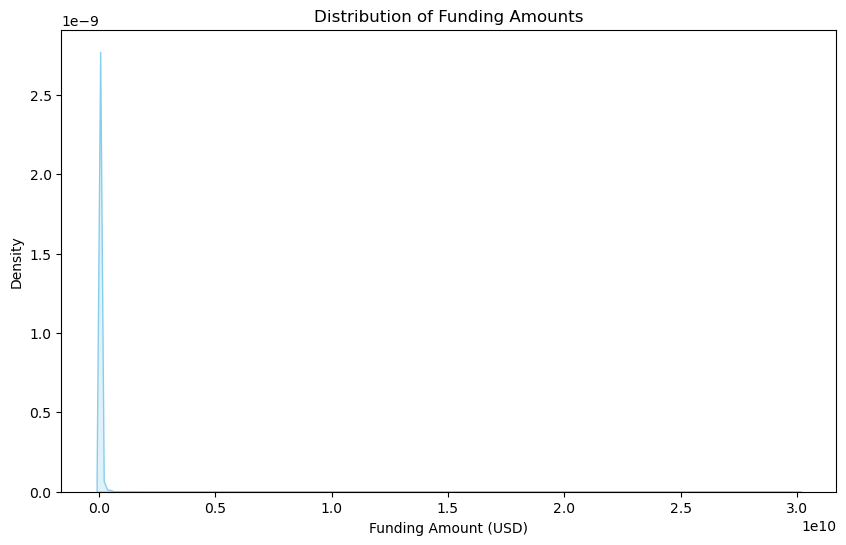

In [15]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.kdeplot(df[' funding_total_usd '], color='skyblue', fill=True)
plt.title('Distribution of Funding Amounts')
plt.xlabel('Funding Amount (USD)')
plt.ylabel('Density')
plt.show()


The distribution of funding amounts exhibits a wide range of values, with a mean of 17.77 million USD and a considerable standard deviation of 218.04 million USD. While the median funding amount is 2 million USD, indicating a significant presence of smaller investments, the maximum value of 30.08 billion USD highlights the potential for substantial capital infusion in select cases. This variation underscores the dynamic nature of funding in the startup ecosystem, ranging from modest investments to high-value funding rounds, reflecting diverse investor strategies and startup growth trajectories.

#### Distribution of Funding Across Different Sources

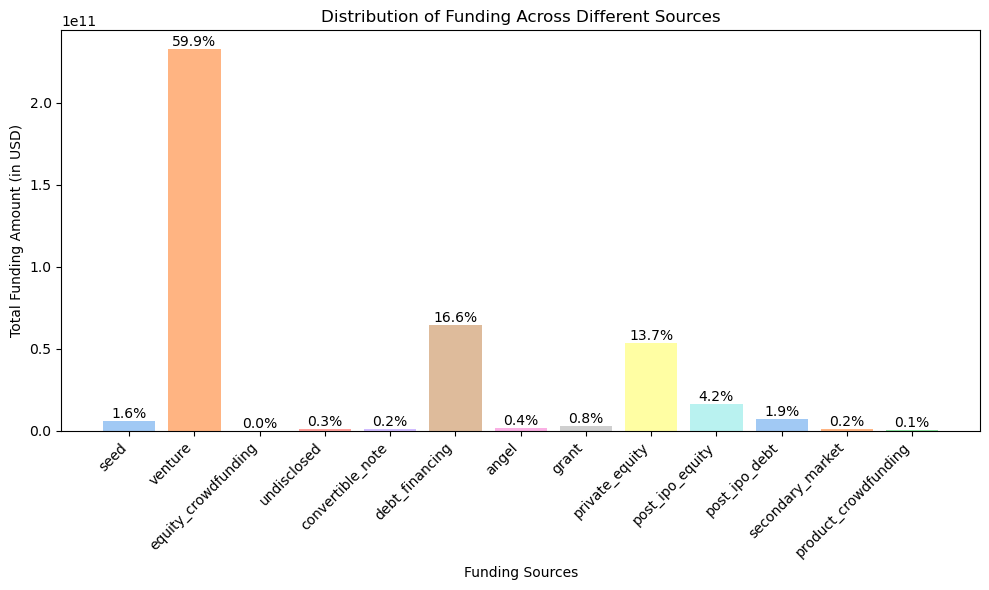

In [16]:
# Define the list of funding sources
funding_sources = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                   'convertible_note', 'debt_financing', 'angel', 'grant', 
                   'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']

# Calculate the total funding amount
total_funding = df[funding_sources].sum()

# Calculate the percentage of each funding source
percentage_funding = (total_funding / total_funding.sum()) * 100

# Plot the stacked bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(funding_sources, total_funding, color=sns.color_palette('pastel'))

# Add percentage labels
for bar, percentage in zip(bars, percentage_funding):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{percentage:.1f}%', ha='center', va='bottom')

# Add labels and title
plt.title('Distribution of Funding Across Different Sources')
plt.xlabel('Funding Sources')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent label overlap
plt.show()


The chart illustrates a substantial reliance on venture funding (59.9%) by startups, followed by notable contributions from debt financing (16.6%) and private equity (13.7%). Post-IPO equity (4.2%) and post-IPO debt (1.9%) represent minority sources, while seed funding (1.7%) and grants (1.2%) play lesser roles.

#### Startup Status Analysis

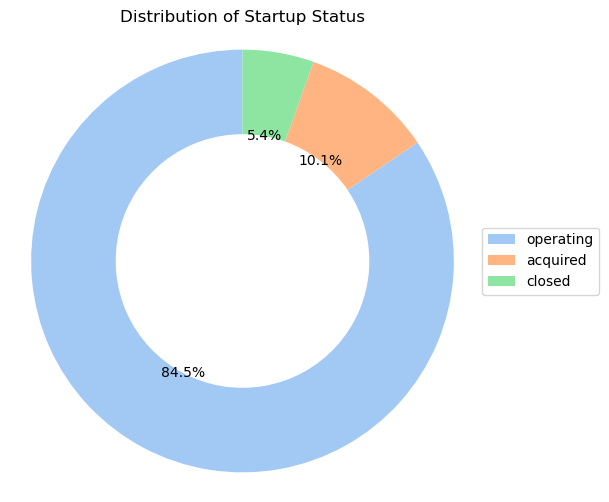

In [17]:
# Calculate counts of each startup status
status_counts = df['status'].value_counts()

# Create a donut chart
plt.figure(figsize=(6, 6))
plt.pie(status_counts, labels=None, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'), wedgeprops=dict(width=0.4))

# Add legend with keys corresponding to labels
plt.legend(status_counts.index, loc='center left', bbox_to_anchor=(1, 0.5))

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')
plt.title('Distribution of Startup Status')
plt.show()


The chart illustrates a dominant presence of operating startups, comprising 84.5% of the dataset. Acquisition of startups represents a notable portion at 10.1%, indicating a subset of successful ventures. Conversely, the closure rate stands at 5.4%, emphasizing the inherent risk and volatility within the startup ecosystem. This breakdown underscores the dynamic nature of startup statuses, highlighting the resilience of operational ventures and the potential for evolution or exit among others.

#### Time Series Analysis:Trends and patterns in startup founding and funding over time

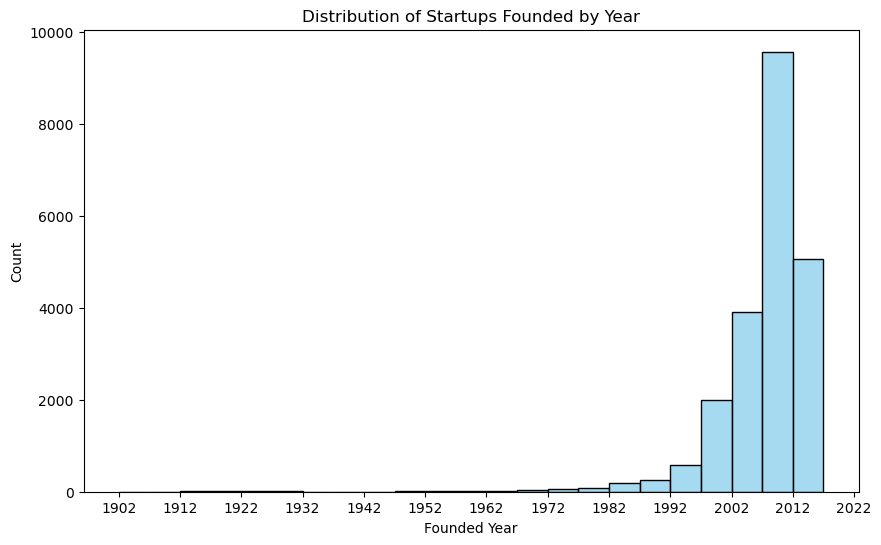

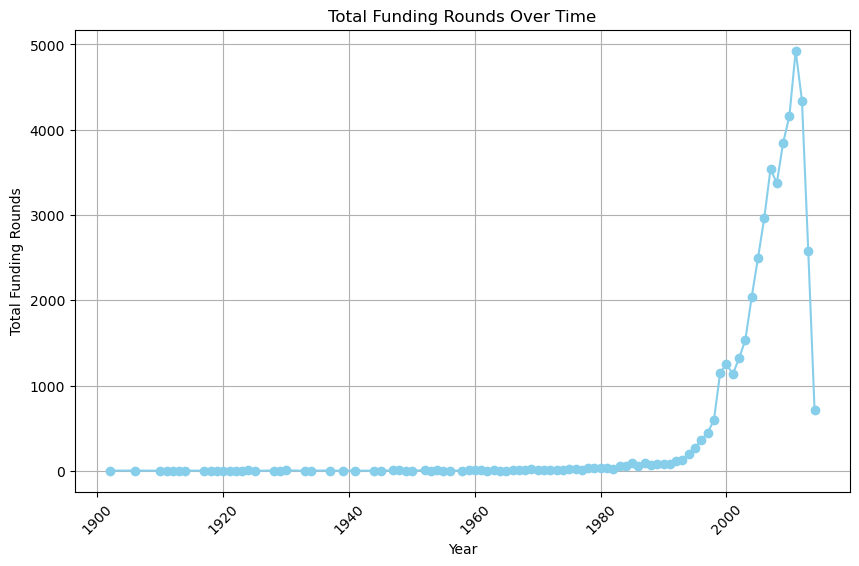

In [18]:
# Drop missing or non-numeric values in the 'founded_year' column
df_cleaned = df.dropna(subset=['founded_year'])
df_cleaned['founded_year'] = df_cleaned['founded_year'].astype(int)  # Convert to integer type if needed

# Plotting the distribution of startups founded by year
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['founded_year'], bins=range(df_cleaned['founded_year'].min(), df_cleaned['founded_year'].max() + 5, 5), kde=False, color='skyblue', edgecolor='black')

# Setting x-axis ticks in multiples of 20 years
plt.xticks(range(df_cleaned['founded_year'].min(), df_cleaned['founded_year'].max() + 10, 10))

plt.title('Distribution of Startups Founded by Year')
plt.xlabel('Founded Year')
plt.ylabel('Count')
plt.show()

# Distribution of funding rounds by year
plt.figure(figsize=(10, 6))
df.groupby('founded_year')['funding_rounds'].sum().plot(kind='line', marker='o', color='skyblue')
plt.title('Total Funding Rounds Over Time')
plt.xlabel('Year')
plt.ylabel('Total Funding Rounds')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Time Series Analysis reveals a consistent trend in startup founding post-1990, with a notable surge in 1999, witnessing a 70% increase in startups founded compared to the previous year. Interestingly, while startup funding began to rise in the early 1990s, the most significant uptick occurred between 2005 and 2012, marking a transformative period for the startup landscape.This surge represents a pivotal moment in startup investment, catalyzing unprecedented growth and reshaping the industry trajectory.

### Unicorns startups

#### what are Unicorn startups?
A unicorn is what most people in the financial world call a startup that is privately-owned with a valuation exceeding 1 billion USD. Some of the more popular unicorns based in the U.S. include home-sharing giant Airbnb, video game company Epic Games, as well as fintech companies Robinhood and SoFi.

Aileen Lee first wrote about unicorns in the venture capital world in her article, "Welcome to the Unicorn Club: Learning from Billion-Dollar Startups." Here, she looked at software startups founded in the 2000s and estimated that only 0.07 percent of them ever reach 1 billion dollar valuation. Startups that managed to reach the 1 billion USD mark, she noted, are so rare that finding one is as difficult as finding a mythical unicorn.

In [19]:
#Making the list of some of the most famous unicorns
df_name_index = df.set_index('name', drop=True)
startup_unicorns = ["Uber","Amazon","Google","Dropbox","Facebook",
                     "Stripe","Airbnb","Robinhood","Reddit",
                    "DigitalOcean","Coursera"]
color = ['Black','Orange','Blue','Darkblue', 'lightblue', 'teal',
         'red','lightgreen','orange','blue','lightblue']
unicorn_founding_year = []
total_funding=[]
seed = []
vc = []
#Extracting its details from the dataset
for i in startup_unicorns:
    unicorn_founding_year.append(int(df_name_index.loc[i]['founded_year']))
    total_funding.append(int(df_name_index.loc[i][' funding_total_usd ']))
    seed.append(int(df_name_index.loc[i]['seed']))
    vc.append(int(df_name_index.loc[i]['venture']))        
df_unicorns = pd.DataFrame(list(zip(startup_unicorns, unicorn_founding_year, total_funding, seed, vc, color)),
                           columns=['Unicorn name', 'Founding year','Total funding', 'Seed', 'Venture Capital', 'Color']).sort_values(by='Seed')
df_unicorns.head(11)

,Unicorn name,Founding year,Total funding,Seed,Venture Capital,Color
1,Amazon,1994,8000000,0,8000000,Orange
2,Google,1998,25100000,0,25000000,Blue
4,Facebook,2004,2425700000,0,615200000,lightblue
10,Coursera,2012,85000000,0,85000000,lightblue
3,Dropbox,2007,1107215000,15000,607200000,Darkblue
8,Reddit,2005,50100000,100000,50000000,orange
0,Uber,2009,1507450000,200000,1506000000,Black
6,Airbnb,2008,794820000,620000,794200000,red
5,Stripe,2010,190000000,2000000,188000000,teal
7,Robinhood,2013,16000000,3000000,13000000,lightgreen


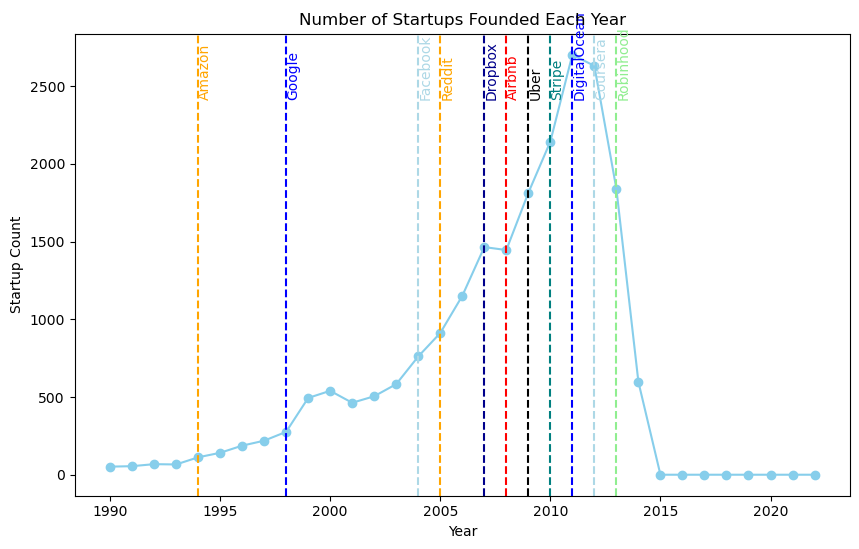

In [20]:
import matplotlib.pyplot as plt

# Define the years in which startups were founded
startup_years = range(1990, 2023)  # Assuming the dataset covers until 2022

# Count the number of startups founded each year
startup_count = [sum(df['founded_year'] == year) for year in startup_years]

# Plot the curve
plt.figure(figsize=(10, 6))
plt.plot(startup_years, startup_count, marker='o', linestyle='-', color='skyblue', label='Startup Count')

# Plot vertical lines for each unicorn's founding year
for year, name, col in zip(df_unicorns['Founding year'], df_unicorns['Unicorn name'], df_unicorns['Color']):
    plt.axvline(x=year, color=col, linestyle='--', label=name)
    plt.text(year, max(startup_count)*0.9, name, rotation=90, color=col)  # Add label inside the chart

plt.title('Number of Startups Founded Each Year')
plt.xlabel('Year')
plt.ylabel('Startup Count')
plt.show()


Companies like **Amazon** and **Google** were among the first ones to capture the market as they happen to be founded when there was a continuous increase in the number of companies getting founded. After some time came **Facebook** which in a way changed the culture and opened the door for other startups and others did follow it.

#### Distribution of startups in various countries

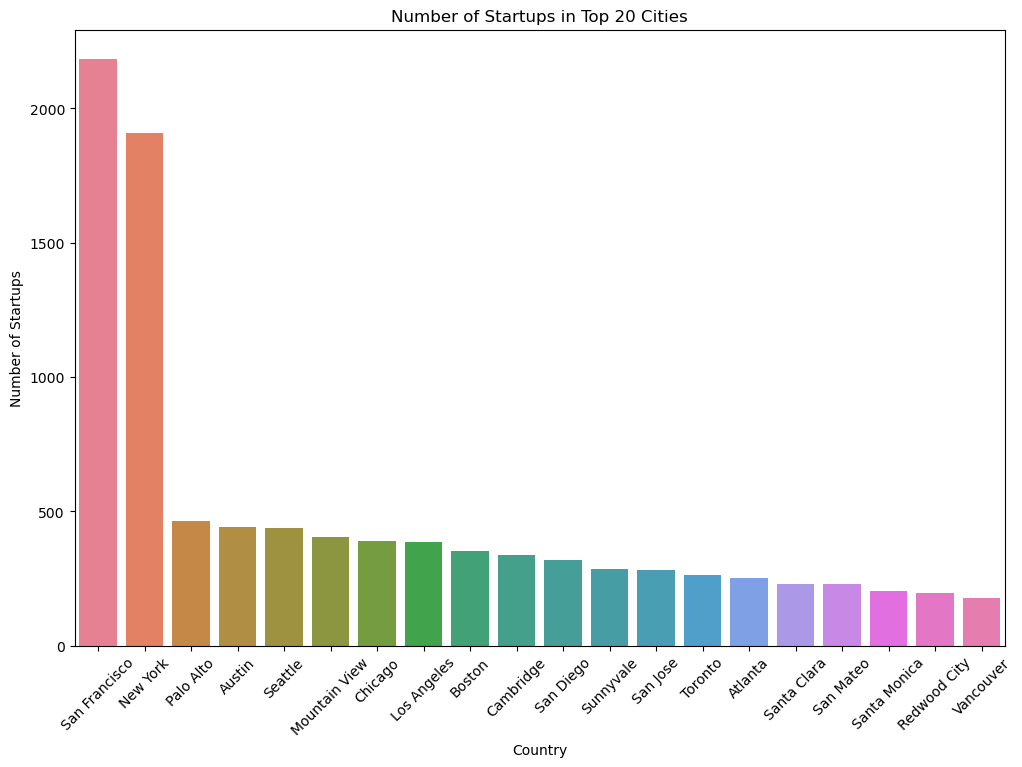

In [21]:
# Get the top 20 countries with the highest number of startups
top_countries = df['city'].value_counts().head(20)

# Create a brighter color palette with varying intensity based on count
colors = sns.color_palette("husl", len(top_countries))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette=colors)

plt.title('Number of Startups in Top 20 Cities')
plt.xlabel('Country')
plt.ylabel('Number of Startups')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()


The dominance of San francisco and Newyork among cities with the highest number of startups is vivid while the variation among other cities isn't so conspicous. But since this data is only till 2014, the current situation is different as many other countries have taken charge and are innovating at a speed that has never been encountered.

#### Distribution of startups in various markets

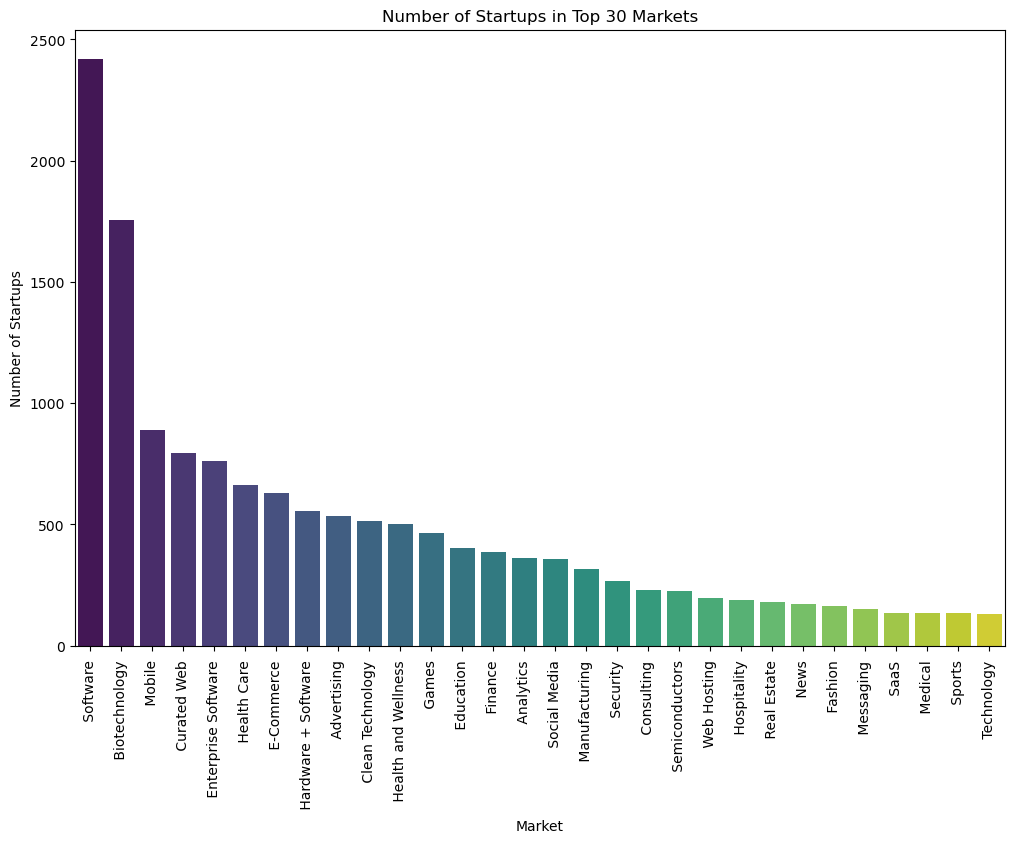

In [22]:
# Get the number of startups in each market
market_counts = df[' market '].value_counts()

# Get the top 30 markets
top_markets = market_counts.head(30)

# Create a brighter color palette with varying intensity based on count
colors = sns.color_palette("viridis", len(top_markets))

# Plotting the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=top_markets.index, y=top_markets.values, palette=colors)

plt.title('Number of Startups in Top 30 Markets')
plt.xlabel('Market')
plt.ylabel('Number of Startups')

plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

plt.show()


It's of no surprise that more than 4500 startups fall into the "Software" market. With the advent of cloud computing and advances in ML/AI capabilities, many new startups are trying to use ML/AI techniques to simplify existing workflows and even create entirely new applications. Software startups also attract a lot of entrepreneurs because of its scalability, the sheer possibility of creating software once and scaling it to be used by millions of people helps make a startup profitable.

#### Analysis of startups by status (Operating, Acquired or Closed) in different markets

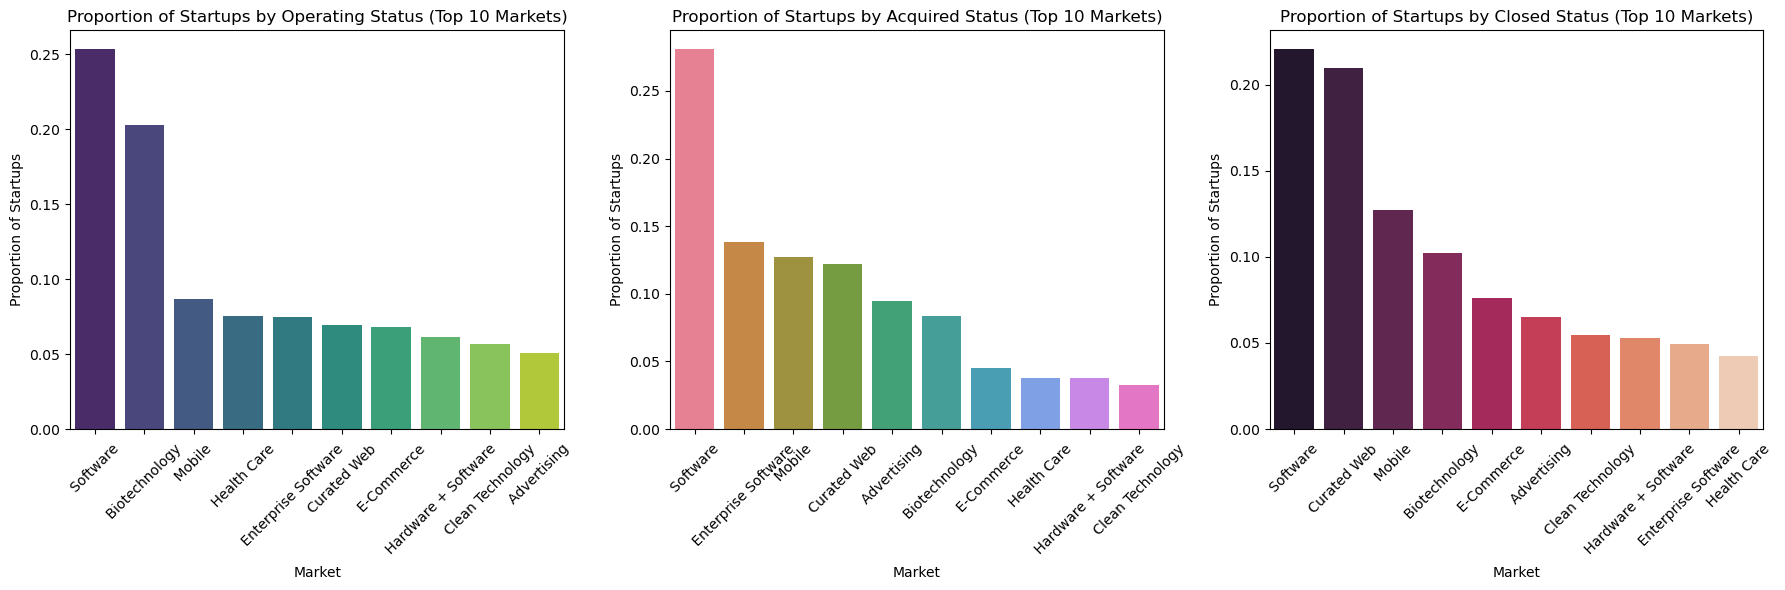

In [23]:
import seaborn as sns

# Create a figure and axes for the subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Filter the DataFrame to include only the top 10 markets
top_10_markets = df[' market '].value_counts().head(10).index
df_top_10 = df[df[' market '].isin(top_10_markets)]

# Proportion of Startups by Operating Status (Top 10 Markets)
operating_status_counts = df_top_10[df_top_10['status'] == 'operating'][' market '].value_counts(normalize=True)
sns.barplot(x=operating_status_counts.index, y=operating_status_counts.values, palette='viridis', ax=axs[0])
axs[0].set_title('Proportion of Startups by Operating Status (Top 10 Markets)')
axs[0].set_xlabel('Market')
axs[0].set_ylabel('Proportion of Startups')
axs[0].tick_params(axis='x', rotation=45)

# Proportion of Startups by Acquired Status (Top 10 Markets)
acquired_status_counts = df_top_10[df_top_10['status'] == 'acquired'][' market '].value_counts(normalize=True)
sns.barplot(x=acquired_status_counts.index, y=acquired_status_counts.values, palette='husl', ax=axs[1])
axs[1].set_title('Proportion of Startups by Acquired Status (Top 10 Markets)')
axs[1].set_xlabel('Market')
axs[1].set_ylabel('Proportion of Startups')
axs[1].tick_params(axis='x', rotation=45)

# Proportion of Startups by Closed Status (Top 10 Markets)
closed_status_counts = df_top_10[df_top_10['status'] == 'closed'][' market '].value_counts(normalize=True)
sns.barplot(x=closed_status_counts.index, y=closed_status_counts.values, palette='rocket', ax=axs[2])
axs[2].set_title('Proportion of Startups by Closed Status (Top 10 Markets)')
axs[2].set_xlabel('Market')
axs[2].set_ylabel('Proportion of Startups')
axs[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

plt.show()


The first subplots gives a general overview of the operating startups and the second a subset of these startups that are being  acquired. The focus is on the third plot which shows markets with the most closed startups. The software market leads this category followed by the curated web, mobile, biotechnology and E-commerce among others.

## Model Building

In [24]:
# dropping redundant features from the dataset
df2.drop(columns=['name', 'category_list', 'state_code', 'region', 'founded_month', 'founded_quarter', 'founded_at'], inplace=True)


#### Feature Engineering

In [25]:
# Create a new column 'target' based on the condition
df2['target'] = df2['status'].apply(lambda x: 1 if x == 'closed' else 0)

# Display the updated DataFrame
#df2.head()


In [26]:
# dropping status column
df2.drop(columns=['status'], inplace=True)

In [27]:
# segment data
label = df2.pop('target')

#### Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
df2[' market '] = label_encoder.fit_transform(df2[' market '])
df2['country_code'] = label_encoder.fit_transform(df2['country_code'])
df2['city'] = label_encoder.fit_transform(df2['city'])

# Display the encoded DataFrame
#df2.head()


#### Feature importance chart

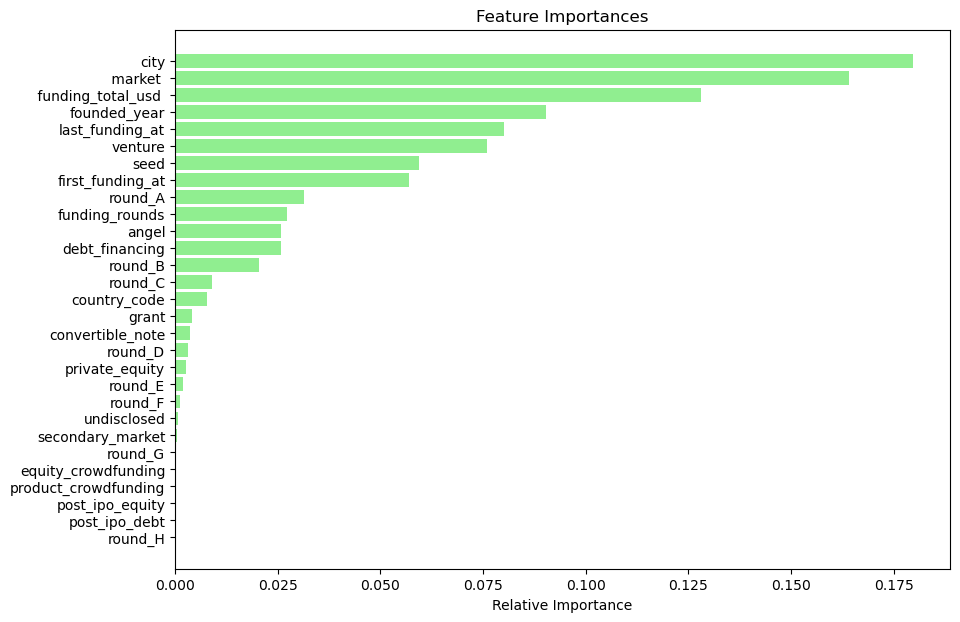

In [29]:
# plotting a feature importance chart to Identify key features from the data set
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df2,label)

# fit the model
model = RandomForestClassifier()
model.fit(df_scaled, label)
feature_names = list(df2.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 7))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [30]:
#dropping features of relatively low importance
df3 = df2.drop(columns=['secondary_market', 'round_G', 'equity_crowdfunding', 'post_ipo_equity', 'product_crowdfunding', 'post_ipo_debt', 'round_H'])


#### Standardization using Standard Scaler

In [31]:
#standardization of features using Standard Scaler
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df3),columns= df3.columns)
scaled_df

,market,funding_total_usd,country_code,city,funding_rounds,founded_year,first_funding_at,last_funding_at,seed,venture,...,debt_financing,angel,grant,private_equity,round_A,round_B,round_C,round_D,round_E,round_F
0,0.536187,-0.073515,0.216406,0.238496,-0.657830,0.666048,0.485817,0.082907,1.296614,-0.311962,...,-0.014430,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
1,1.302068,-0.081541,0.216406,-1.360436,-0.657830,0.406152,1.159923,0.867063,-0.252214,-0.311962,...,-0.014430,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
2,-0.168011,-0.081541,0.216406,-0.157058,-0.657830,-2.712590,-0.188289,-0.701248,-0.252214,-0.311962,...,-0.014430,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
3,-0.168011,-0.073515,0.216406,-0.461617,-0.657830,-2.972485,0.148764,-0.309170,-0.252214,-0.311962,...,-0.014430,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
4,-0.661464,-0.072139,0.216406,1.609010,1.238301,-0.763376,-0.525342,-0.309170,-0.252214,-0.311962,...,-0.004436,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21834,0.741793,-0.021918,0.216406,0.641479,-0.657830,0.925943,1.159923,0.867063,-0.252214,0.068854,...,-0.014430,-0.144474,-0.036995,-0.060353,-0.282936,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
21835,1.471692,3.892785,0.216406,0.866184,4.398520,0.016310,-1.199448,-0.309170,-0.252214,25.072388,...,-0.014430,-0.144474,-0.036995,-0.060353,2.310067,36.308465,49.344936,-0.09177,-0.085215,-0.032902
21836,-1.314261,0.033119,0.216406,-0.779175,-0.657830,0.146257,-0.188289,-0.701248,-0.252214,0.420377,...,-0.014430,-0.144474,-0.036995,-0.060353,4.031258,-0.228207,-0.190067,-0.09177,-0.085215,-0.032902
21837,-1.314261,0.075657,0.216406,-0.794031,1.238301,-1.153219,-0.188289,0.867063,-0.252214,0.472374,...,-0.014430,-0.144474,1.819247,-0.060353,-0.282936,1.006185,-0.190067,-0.09177,-0.085215,-0.032902


#### Implementing Random Undersampling to deal with class imbalance

There is a significant class imbalance in the dataset, with the majority of the startup status labeled as "Operating" and "Acquired"(94.6%) while just 5.4% are labeled as "closed". This can cause the model to be biased towards predicting the majority class and perform poorly on minority classes.

In [32]:
from imblearn.under_sampling import RandomUnderSampler

# Define the under-sampling ratio ( undersample majority class to be 5 times the size of minority class)
under_sample = RandomUnderSampler(sampling_strategy={0: 5 * label.value_counts()[1]})

# Undersample the data
scaled_df_resampled, label_resampled = under_sample.fit_resample(scaled_df, label)

#### Split data into training and testing set

In [33]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df_resampled, label_resampled, test_size=0.3, random_state= 1)

#### Instatiating models & Evaluations

In [34]:
# Instatiate Gradient boosting model
# Define class weights ( weight for minority class is 3 times higher)
#class_weight = {0: 1, 1: 3}
g_boost = GradientBoostingClassifier()

# Train model
g_boost.fit(x_train, y_train)

GradientBoostingClassifier()

In [35]:
#Model Prediction file
g_pred = g_boost.predict(x_test)
print("Gradient boosting")
print("Accuracy:", accuracy_score(y_test, g_pred))
print("Precision:", precision_score(y_test, g_pred))
print("Recall:", recall_score(y_test, g_pred))
print("F1-score:", f1_score(y_test, g_pred))
print("AUC-ROC:", roc_auc_score(y_test, g_pred))

Gradient boosting
Accuracy: 0.8412698412698413
Precision: 0.543859649122807
Recall: 0.2619718309859155
F1-score: 0.35361216730038025
AUC-ROC: 0.6091616289792476


In [36]:
# Instatiate model- DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()

# Training model
dec_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [37]:
#Model Prediction file - DecisionTreeClassifier
dec_pred = dec_tree.predict(x_test)
print("DecisionTreeClassifier")
print("Accuracy:", accuracy_score(y_test, dec_pred))
print("Precision:", precision_score(y_test, dec_pred))
print("Recall:", recall_score(y_test, dec_pred))
print("F1-score:", f1_score(y_test, dec_pred))
print("AUC-ROC:", roc_auc_score(y_test, dec_pred))

DecisionTreeClassifier
Accuracy: 0.7675070028011205
Precision: 0.3152454780361757
Recall: 0.3436619718309859
F1-score: 0.32884097035040427
AUC-ROC: 0.597684371477888


In [38]:
# Applying 8 machine learning algorithms to the dataset and Evaluating their perfromance

classifiers = [[XGBClassifier(), 'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbors'],
               [SGDClassifier(), 'SGD Classifier'],
               [SVC(), 'SVC'],
               [GaussianNB(),'Naive Bayes'],
               [DecisionTreeClassifier(random_state= 42), 'Decision Tree'],
               [LogisticRegression(), 'Logistic Regression']
              ]


# Fitting and Evaluating the algorithms
accuracy_list= {}
precision_list= {}
recall_list= {}
roc_list= {}

for classifier in classifiers:
    model= classifier[0]
    model.fit(x_train, y_train)
    model_name= classifier[1]
    
    pred= model.predict(x_test)
    
    a_score = accuracy_score(y_test, pred)
    p_score = precision_score(y_test, pred)
    r_score = recall_score(y_test, pred)
    roc_score = roc_auc_score(y_test, pred)
    
    accuracy_list[model_name]= ([str(round(a_score*100,2))+ '%'])
    precision_list[model_name]= ([str(round(p_score*100,2))+ '%'])
    recall_list[model_name]= ([str(round(r_score*100,2))+ '%'])
    roc_list[model_name]= ([str(round(roc_score*100,2))+ '%'])
    
    
    if model_name != classifiers[-1][1]:
        print('')

In [39]:
print('Accuracy score')
s1= pd.DataFrame(accuracy_list)
s1.head()

Accuracy score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,82.35%,83.29%,81.98%,83.33%,83.43%,26.38%,77.12%,82.96%


In [40]:
print('Precision score')
s2= pd.DataFrame(precision_list)
s2.head()

Precision score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,44.98%,49.1%,43.11%,0.0%,50.0%,17.77%,31.61%,43.75%


In [41]:
print('recall score')
s3= pd.DataFrame(recall_list)
s3.head()

recall score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,29.01%,23.1%,27.32%,0.0%,1.13%,94.93%,32.68%,9.86%


In [42]:
print('ROC score')
s4= pd.DataFrame(roc_list)
s4.head()

ROC score


,XGB Classifier,Random Forest,K-Nearest Neighbors,SGD Classifier,SVC,Naive Bayes,Decision Tree,Logistic Regression
0,60.98%,59.17%,60.08%,49.94%,50.45%,53.84%,59.32%,53.67%


#### Hyperparameter Optimization for Naive Bayes model

In [43]:
from sklearn.model_selection import GridSearchCV

# Instantiate the Naive Bayes model
nb_model = GaussianNB()

# Fit the model on the training data
nb_model.fit(x_train, y_train)

# Test the model on the test set
y_proba = nb_model.predict_proba(x_test)[:, 1]
y_pred = (y_proba > 0.2).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.2563
Precision: 0.1773
Recall: 0.9577
ROC-AUC Score: 0.7400
Confusion Matrix:
[[ 209 1578]
 [  15  340]]


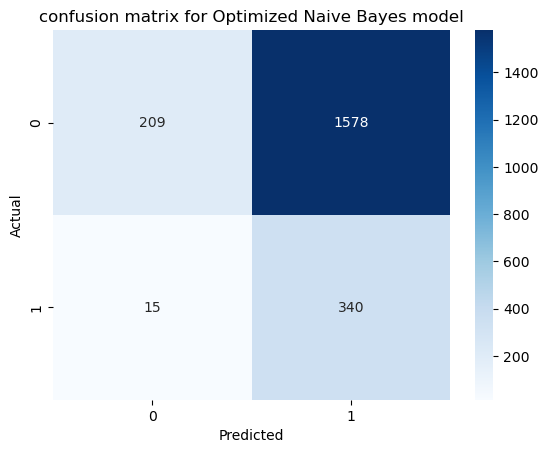

In [44]:
# Building Confusion matrix

# 0 - stands for startups that are operational and acquired
# 1 - stands for startups that are closed

lcm= confusion_matrix(y_test,y_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix for Optimized Naive Bayes model')
plt.show()

#### Logisitic Regression Optimization

In [45]:
# Instantiate Logistic Regression model
# Define class weights ( weight for minority class is 3 times higher)
class_weight = {0: 1, 1: 8}
log_reg = LogisticRegression(class_weight=class_weight)
# Train model
log_reg.fit(x_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 8})

In [46]:
# Model Prediction file
log_pred = log_reg.predict(x_test)
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, log_pred))
print("Precision:", precision_score(y_test, log_pred))
print("Recall:", recall_score(y_test, log_pred))
print("F1-score:", f1_score(y_test, log_pred))
print("AUC-ROC:", roc_auc_score(y_test, log_pred))

Logistic Regression
Accuracy: 0.7012138188608776
Precision: 0.3404255319148936
Recall: 0.856338028169014
F1-score: 0.48717948717948717
AUC-ROC: 0.7633676710514908


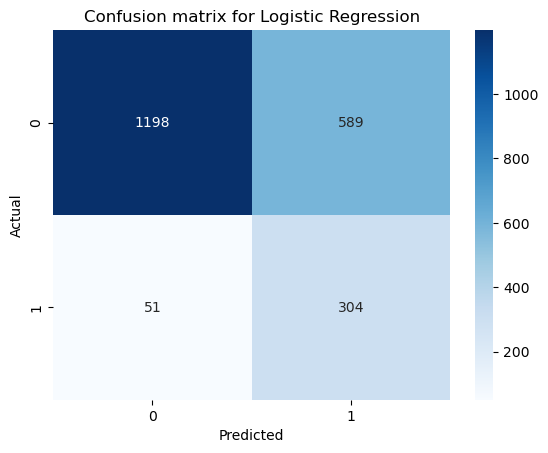

In [47]:
# Building Confusion matrix

# 0 - stands for startups that are operational and acquired
# 1 - stands for startups that are closed
lcm= confusion_matrix(y_test,log_pred)

#visualize the confusion matrix
sns.heatmap(lcm, annot= True, cmap= 'Blues', fmt= 'g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion matrix for Logistic Regression')
plt.show()

### Conclusion

The logistic regression model(optimized) and the Naive Bayes model(optimized) were the top performing model with recall score of 85.6% and 95.8% respectively.
High Recall score indicates that the model is effective at identifying all relevant instances of the positive class(closed startups in this case), which is desirable in scenarios where missing positive cases is costly or harmful to stakeholders. Although Naive Bayes model scored high on recall, it performed very low on precision(17.7%) and accuracy(25.6%) which means that it predicted more false positive results which isn't too good for the stakeholders, considering the large number of false positives predictions. The logistic regression model performed better in precision(34.0%) and accuracy (70.1%) which makes it the ideal model in this scenario.

### Selected model: Logistic regression 
- **Recall score: 85.6%**
- **Accuracy: 70.1%**

## Productionize

In [48]:
import joblib

filename = "./log_reg.pkl"
joblib.dump(log_reg, filename)

['./log_reg.pkl']